In [57]:
import pandas as pd
import matplotlib.pyplot as plt

netflix = pd.read_csv("netflix_titles.csv")
bitcoin = pd.read_csv("BitCoin.csv")
ethereum = pd.read_csv("ETH.csv")

# print(netflix.head())
# print(bitcoin.head())
# print(ethereum.head())

## Netflix : Mandatory Part

- Mission : 한국 작품은 총 얼마나 있는가?   
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [12]:
sth = netflix[netflix["country"]=="South Korea"]     
sth.count().show_id   #한국작품 총 개수

183

## Netflix: Bonus Part

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

In [25]:
# filtering values that have multiple countries

netflix = netflix[~netflix["country"].str.contains(", ", na=False)]      #na=False: na는 제외
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [32]:
# grouping by countries (split) : groupby()
# counting all the productions for each country (apply) : count()
# sorting in descending order to find the max value : sort_value(ascending=False)

netflix.groupby("country").count().sort_values("show_id",ascending=False).show_id  # 미국이 2555개로 최다 프로듀싱 국가

country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
                  ... 
Cyprus               1
Senegal              1
Namibia              1
Finland              1
Zimbabwe             1
Name: show_id, Length: 72, dtype: int64

## Bitcoin: Mandatory Part

- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.
    - 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  
    
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [58]:
# slicing datas from [2016-06-1] ~ [2017-06-30]
bitcoin = bitcoin[(bitcoin["Date"]>="2016-06-1") & (bitcoin["Date"]<"2017-07-01")]

# inserting "Moving Average"
bitcoin["Moving Average"] = bitcoin["Open"].rolling(window=5).mean()

# droping NaN values
bitcoin.dropna(axis=0,inplace=True)

bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,Moving Average
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,4536.640
21,21,2017-01-09,4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000,4601.674
47,47,2017-06-08,3257.61,3293.29,3155.60,3213.94,1.105030e+09,53720900000,4407.538
48,48,2017-05-08,2897.63,3290.01,2874.83,3252.91,1.945700e+09,47778200000,4068.738
49,49,2017-04-08,2806.93,2899.33,2743.72,2895.89,1.002120e+09,46276200000,3713.070
...,...,...,...,...,...,...,...,...,...
620,620,2016-11-01,448.70,450.66,443.86,448.43,4.045000e+07,6761090000,404.714
621,621,2016-10-01,448.24,448.31,440.35,447.99,3.599590e+07,6752210000,419.678
622,622,2016-09-01,453.38,454.64,446.89,447.61,3.227800e+07,6828000000,435.002
623,623,2016-08-01,457.54,462.93,447.94,453.23,5.699300e+07,6888600000,451.208


In [59]:
# turning date into the index
bitcoin.set_index("Date",inplace=True)

bitcoin

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,Moving Average
Date,,,,,,,,
2017-02-09,20,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,4536.640
2017-01-09,21,4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000,4601.674
2017-06-08,47,3257.61,3293.29,3155.60,3213.94,1.105030e+09,53720900000,4407.538
2017-05-08,48,2897.63,3290.01,2874.83,3252.91,1.945700e+09,47778200000,4068.738
2017-04-08,49,2806.93,2899.33,2743.72,2895.89,1.002120e+09,46276200000,3713.070
...,...,...,...,...,...,...,...,...
2016-11-01,620,448.70,450.66,443.86,448.43,4.045000e+07,6761090000,404.714
2016-10-01,621,448.24,448.31,440.35,447.99,3.599590e+07,6752210000,419.678
2016-09-01,622,453.38,454.64,446.89,447.61,3.227800e+07,6828000000,435.002


In [62]:
# turning str into dateTime 
bitcoin.index = pd.to_datetime(bitcoin.index)

# sorting by time
bitcoin.sort_index(ascending=True,inplace=True)
bitcoin

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,Moving Average
Date,,,,,,,,
2016-06-10,351,612.47,613.82,611.47,613.02,5.681210e+07,9742370000,615.682
2016-06-11,320,703.81,714.26,699.56,711.52,5.990220e+07,11233000000,710.062
2016-06-12,290,758.72,765.62,758.72,764.22,1.162180e+08,12159400000,766.794
2016-06-13,466,671.65,716.00,664.49,704.38,2.432950e+08,10511900000,705.368
2016-06-14,465,704.50,704.50,662.80,685.56,1.866940e+08,11028900000,720.790
...,...,...,...,...,...,...,...,...
2017-06-26,88,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2545.770
2017-06-27,87,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2526.176
2017-06-28,86,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2517.766


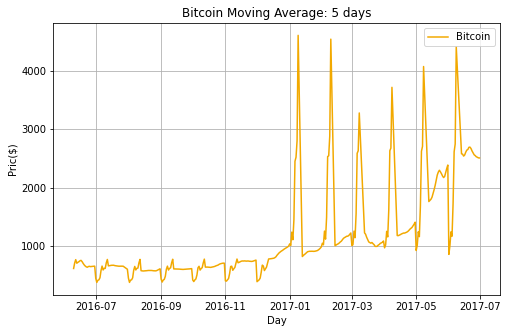

In [67]:
#plotting

plt.figure(figsize=(8,5))
plt.plot(bitcoin.index, bitcoin["Moving Average"], color="#f2a900", label="Bitcoin")
plt.xlabel("Day")
plt.ylabel("Pric($)")
plt.title("Bitcoin Moving Average: 5 days")
plt.grid()
plt.legend()
plt.show()


## Bitcoin: Bonus Part

- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

    - 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 Open Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [104]:
btc = pd.read_csv("BitCoin.csv")
btc

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [105]:

# slicing datas from [2016-06-1] ~ [2017-06-30]
eth = ethereum[(ethereum["Date"]>="2016-06-1") & (ethereum["Date"]<"2017-07-01")]
btc = btc[(btc["Date"]>="2016-06-1") & (btc["Date"]<"2017-07-01")]

# inserting "Moving Average"
eth["M.A-ETH"] = eth["Open"].rolling(window=5).mean()
btc["M.A-BTC"] = btc["Open"].rolling(window=5).mean()

# droping NaN values
eth.dropna(axis=0,inplace=True)
btc.dropna(axis=0,inplace=True)

btc

<ipython-input-105-be97f8c8f2be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth["M.A-ETH"] = eth["Open"].rolling(window=5).mean()
<ipython-input-105-be97f8c8f2be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["M.A-BTC"] = btc["Open"].rolling(window=5).mean()
<ipython-input-105-be97f8c8f2be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,M.A-BTC
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,4536.640
21,21,2017-01-09,4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000,4601.674
47,47,2017-06-08,3257.61,3293.29,3155.60,3213.94,1.105030e+09,53720900000,4407.538
48,48,2017-05-08,2897.63,3290.01,2874.83,3252.91,1.945700e+09,47778200000,4068.738
49,49,2017-04-08,2806.93,2899.33,2743.72,2895.89,1.002120e+09,46276200000,3713.070
...,...,...,...,...,...,...,...,...,...
620,620,2016-11-01,448.70,450.66,443.86,448.43,4.045000e+07,6761090000,404.714
621,621,2016-10-01,448.24,448.31,440.35,447.99,3.599590e+07,6752210000,419.678
622,622,2016-09-01,453.38,454.64,446.89,447.61,3.227800e+07,6828000000,435.002
623,623,2016-08-01,457.54,462.93,447.94,453.23,5.699300e+07,6888600000,451.208


In [106]:
# changing Date to Index

btc.set_index("Date",inplace=True)
eth.set_index("Date",inplace=True)

In [107]:
# joining M.A-ETH to btc

btc = btc.join(eth["M.A-ETH"])

In [108]:
# changing date into datetime

btc.index = pd.to_datetime(btc.index)
btc

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,M.A-BTC,M.A-ETH
Date,,,,,,,,,
2017-02-09,20,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,4536.640,11.318
2017-01-09,21,4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000,4601.674,10.194
2017-06-08,47,3257.61,3293.29,3155.60,3213.94,1.105030e+09,53720900000,4407.538,293.498
2017-05-08,48,2897.63,3290.01,2874.83,3252.91,1.945700e+09,47778200000,4068.738,89.468
2017-04-08,49,2806.93,2899.33,2743.72,2895.89,1.002120e+09,46276200000,3713.070,43.786
...,...,...,...,...,...,...,...,...,...
2016-11-01,620,448.70,450.66,443.86,448.43,4.045000e+07,6761090000,404.714,10.902
2016-10-01,621,448.24,448.31,440.35,447.99,3.599590e+07,6752210000,419.678,13.310
2016-09-01,622,453.38,454.64,446.89,447.61,3.227800e+07,6828000000,435.002,11.976


In [111]:
# sorting by Time
btc.sort_index(ascending=True,inplace=True)
btc

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,M.A-BTC,M.A-ETH
Date,,,,,,,,,
2016-06-10,351,612.47,613.82,611.47,613.02,5.681210e+07,9742370000,615.682,15.188
2016-06-11,320,703.81,714.26,699.56,711.52,5.990220e+07,11233000000,710.062,16.078
2016-06-12,290,758.72,765.62,758.72,764.22,1.162180e+08,12159400000,766.794,16.962
2016-06-13,466,671.65,716.00,664.49,704.38,2.432950e+08,10511900000,705.368,18.330
2016-06-14,465,704.50,704.50,662.80,685.56,1.866940e+08,11028900000,720.790,18.310
...,...,...,...,...,...,...,...,...,...
2017-06-26,88,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2545.770,285.866
2017-06-27,87,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2526.176,NaN
2017-06-28,86,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2517.766,NaN


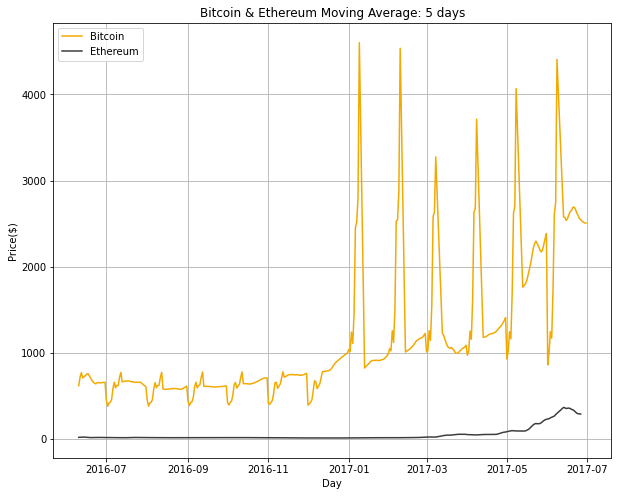

In [113]:
# plotting

plt.figure(figsize=(10,8))
plt.plot(btc.index, btc["M.A-BTC"], color="#f2a900", label="Bitcoin")
plt.plot(btc.index, btc["M.A-ETH"], color="#3c3c3d", label="Ethereum")
plt.title("Bitcoin & Ethereum Moving Average: 5 days")
plt.xlabel("Day")
plt.ylabel("Price($)")
plt.legend()
plt.grid()
plt.show()

### << 막혔던 곳 >>

#### - Netflix -
- multiple country 필터링하기: `str.contains(", ")`로 해결
- na error: `na=False` option으로 해결
- count() 결과값 "show_id" column에 담김

#### - Bitcoin -
- 선 끊김현상: 원인 = na값 -> `dropna(axis=0)`으로 해결
- x축을 date로: `set_index("Date")`로 해결 -> 이 코드 이후에 date를 쓰면 안됨에 유의 (해당 칼럼이 사라졌으므로)
- x축에 date가 안보이는 현상: 
    - 원인 = date는 string형태이므로 datetime으로 변환이 필요 
    - 해결 = `pd.to_datetime()`으로 해결
- 데이터 합치기: `.join()`으로 해결 -> index 날짜로 설정했기 때문에 같은 날짜인 것만 가져올 수 있었음
- 선이 위아래로 그려지는 현상: 
    - 원인 = index(date)가 정렬되지 않았기 때문
    - 해결 = `.sort_index(ascending=True)`로 해결 -> 이때, sort_value가 아닌 sort_index에 유의